In [1]:
import sys
import os
import random

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

# Diffusion, RD, and ACP

472


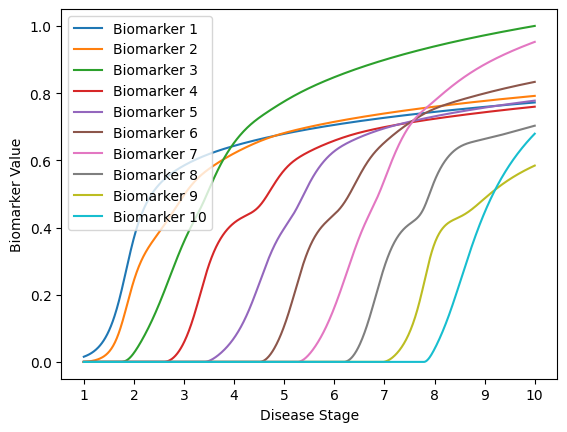

In [2]:
n_biomarker_stages = 10
model_type = 'acp'

# generate the canonical model
seed = random.randint(0,1000)
print(seed)
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=302)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [5]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

Starting Order: [8 1 9 6 2 4 0 5 3 7], kendall-tau:-0.1111111111111111


100%|██████████| 10000/10000 [00:02<00:00, 3720.51it/s]


Greedy Ascent Result: [9 8 7 6 5 4 3 2 1 0]


100%|██████████| 500000/500000 [02:15<00:00, 3681.21it/s]

[0 1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1 0]
Best Order: [9 8 7 6 5 4 3 2 1 0]
Spearman's Rho: None
Kendall's Tau: -0.9999999999999999


In [4]:
# No greedy ascent
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = prior)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

Starting Order: [3 8 6 4 7 9 0 5 2 1], kendall-tau:-0.28888888888888886


100%|██████████| 10000/10000 [00:02<00:00, 3681.20it/s]


Greedy Ascent Result: [9 8 7 6 5 4 3 2 1 0]


100%|██████████| 500000/500000 [02:16<00:00, 3662.09it/s]

[0 1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1 0]
Best Order: [9 8 7 6 5 4 3 2 1 0]
Spearman's Rho: None
Kendall's Tau: -0.9999999999999999


## DIFFUSION MODEL

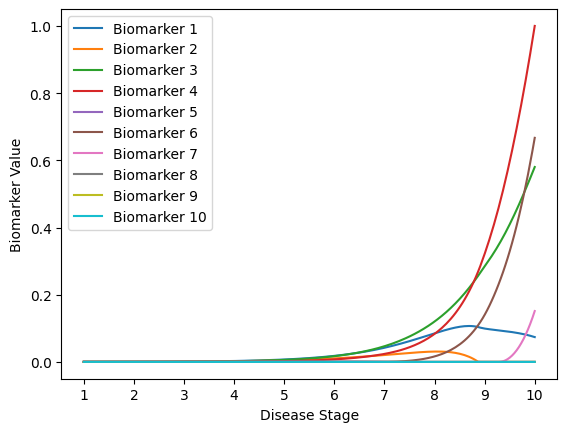

In [14]:
n_biomarker_stages = 10
model_type = 'diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=3)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [15]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

Starting Order: [2 9 6 3 7 8 5 0 4 1], kendall-tau:-0.28888888888888886


100%|██████████| 10000/10000 [00:02<00:00, 3705.04it/s]


Greedy Ascent Result: [8 7 9 4 1 6 0 5 3 2]


100%|██████████| 500000/500000 [02:16<00:00, 3653.97it/s]

[0 1 2 3 4 5 6 7 8 9]
[8 7 9 4 1 6 0 5 3 2]
Best Order: [8 7 9 4 1 6 0 5 3 2]
Spearman's Rho: None
Kendall's Tau: -0.5111111111111111


## REACTION DIFFUSION

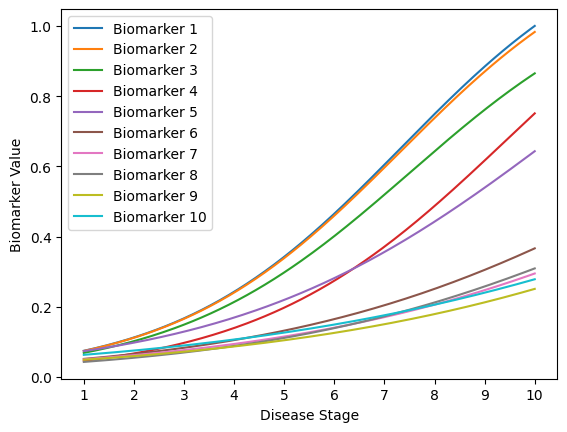

In [9]:
n_biomarker_stages = 10
model_type = 'reaction_diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=10)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=10, skewness=-1)
patient_samples = sample_generator.patient_samples

In [10]:
# RD No Prior
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

Starting Order: [7 3 5 9 8 6 0 2 4 1], kendall-tau:-0.37777777777777777


100%|██████████| 10000/10000 [00:02<00:00, 3678.86it/s]


Greedy Ascent Result: [8 7 6 9 5 3 4 2 1 0]


100%|██████████| 500000/500000 [02:17<00:00, 3635.15it/s]

[0 1 2 3 4 5 6 7 8 9]
[8 7 6 9 5 3 4 2 1 0]
Best Order: [8 7 6 9 5 3 4 2 1 0]
Spearman's Rho: None
Kendall's Tau: -0.8222222222222221


In [11]:
from scipy.stats import spearmanr
print(spearmanr([0,1,2,3,4,5,6,7,8,9],[1,2,0,3,5,4,8,9,6,7]))

SignificanceResult(statistic=0.8545454545454544, pvalue=0.0016368033159867143)


In [12]:
# RD w/ Prior
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

Starting Order: [5 6 1 3 0 7 4 2 9 8], kendall-tau:0.24444444444444444


100%|██████████| 10000/10000 [00:02<00:00, 3657.71it/s]


Greedy Ascent Result: [8 7 6 9 5 3 4 2 1 0]


100%|██████████| 500000/500000 [02:17<00:00, 3629.82it/s]

[0 1 2 3 4 5 6 7 8 9]
[8 7 6 9 5 3 4 2 1 0]


AttributeError: 'NoneType' object has no attribute 'summary'

## ODE demo

self.time_points length: 203, self.model_values[0] length: 203
self.time_points length: 203, self.model_values[1] length: 203
self.time_points length: 203, self.model_values[2] length: 203
self.time_points length: 203, self.model_values[3] length: 203
self.time_points length: 203, self.model_values[4] length: 203
self.time_points length: 203, self.model_values[5] length: 203
self.time_points length: 203, self.model_values[6] length: 203
self.time_points length: 203, self.model_values[7] length: 203
self.time_points length: 203, self.model_values[8] length: 203
self.time_points length: 203, self.model_values[9] length: 203


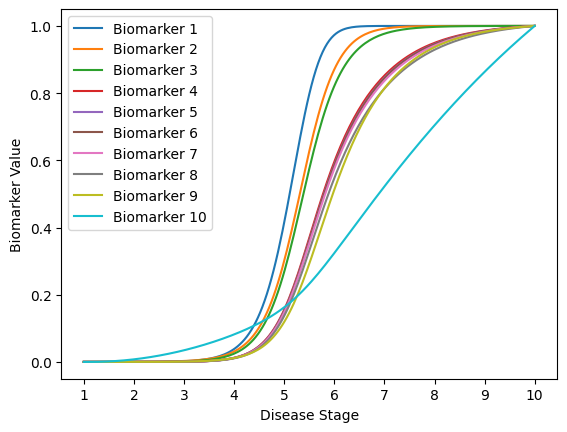

In [6]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 10
model_type = 'logistic'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=11)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [7]:
# Logistic No Priors
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3681.94it/s]


Greedy Ascent Result: [0 1 2 5 8 6 7 3 4 9]


100%|██████████| 500000/500000 [02:22<00:00, 3520.50it/s]

Best Order: [0 1 2 3 8 6 4 5 7 9]
Spearman's Rho: None
Kendall's Tau: 0.7333333333333333


In [8]:
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3500.36it/s]


Greedy Ascent Result: [0 1 2 3 8 6 4 5 7 9]


100%|██████████| 500000/500000 [02:24<00:00, 3468.17it/s]


AttributeError: 'NoneType' object has no attribute 'summary'